In [ ]:
# LAB-05 MACHINE LEARNING

In [12]:
# A1 - Train a Linear Regression model with one attribute
import pandas as pd
from sklearn.linear_model import LinearRegression

def train_single_feature_lr(X_train, y_train):

    model = LinearRegression()
    model.fit(X_train, y_train)
    return model

if __name__ == "__main__":
    # Load dataset
    df = pd.read_csv("RFMiD_Training_Labels.csv")
    
    # Assume last column is target
    X = df.iloc[:, [0]]  # first column as feature
    y = df.iloc[:, -1]   # last column as target
    
    # Train model
    lr_model = train_single_feature_lr(X, y)
    
    # Predict on training data
    y_pred_train = lr_model.predict(X)
    
    print("Training Predictions (first 10):", y_pred_train[:10])


Training Predictions (first 10): [-0.00059756 -0.0005964  -0.00059523 -0.00059407 -0.0005929  -0.00059173
 -0.00059057 -0.0005894  -0.00058824 -0.00058707]


In [14]:
# A2 - Evaluate Linear Regression model using MSE, RMSE, MAPE, R2
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
import numpy as np

def evaluate_regression_metrics(X_train, X_test, y_train, y_test):
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    metrics_train = {
        "MSE": mean_squared_error(y_train, y_pred_train),
        "RMSE": np.sqrt(mean_squared_error(y_train, y_pred_train)),
        "MAPE": mean_absolute_percentage_error(y_train, y_pred_train),
        "R2": r2_score(y_train, y_pred_train)
    }
    
    metrics_test = {
        "MSE": mean_squared_error(y_test, y_pred_test),
        "RMSE": np.sqrt(mean_squared_error(y_test, y_pred_test)),
        "MAPE": mean_absolute_percentage_error(y_test, y_pred_test),
        "R2": r2_score(y_test, y_pred_test)
    }
    
    return metrics_train, metrics_test

if __name__ == "__main__":
    df = pd.read_csv("RFMiD_Training_Labels.csv")
    X = df.iloc[:, [0]]  # single attribute
    y = df.iloc[:, -1]
    
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    train_metrics, test_metrics = evaluate_regression_metrics(X_train, X_test, y_train, y_test)
    
    print("Train Metrics:", train_metrics)
    print("Test Metrics:", test_metrics)


Train Metrics: {'MSE': 0.0006499706349237928, 'RMSE': 0.025494521664934072, 'MAPE': 3824640608310.1587, 'R2': 0.0009947106884923285}
Test Metrics: {'MSE': 1.0463214832324035e-06, 'RMSE': 0.0010228985693764576, 'MAPE': 3753295526368.422, 'R2': 0.0}


In [16]:
# A3 - Train & evaluate LR model with multiple attributes
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
import numpy as np

def train_multi_feature_lr(X_train, X_test, y_train, y_test):
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    metrics_train = {
        "MSE": mean_squared_error(y_train, y_pred_train),
        "RMSE": np.sqrt(mean_squared_error(y_train, y_pred_train)),
        "MAPE": mean_absolute_percentage_error(y_train, y_pred_train),
        "R2": r2_score(y_train, y_pred_train)
    }
    
    metrics_test = {
        "MSE": mean_squared_error(y_test, y_pred_test),
        "RMSE": np.sqrt(mean_squared_error(y_test, y_pred_test)),
        "MAPE": mean_absolute_percentage_error(y_test, y_pred_test),
        "R2": r2_score(y_test, y_pred_test)
    }
    
    return metrics_train, metrics_test

if __name__ == "__main__":
    df = pd.read_csv("RFMiD_Training_Labels.csv")
    X = df.iloc[:, :-1]  # all features except target
    y = df.iloc[:, -1]   # target
    
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    train_metrics, test_metrics = train_multi_feature_lr(X_train, X_test, y_train, y_test)
    
    print("Train Metrics:", train_metrics)
    print("Test Metrics:", test_metrics)


Train Metrics: {'MSE': 0.0006379091849775228, 'RMSE': 0.02525686411606799, 'MAPE': 6597086136050.515, 'R2': 0.01953316711353159}
Test Metrics: {'MSE': 1.8745547585729833e-05, 'RMSE': 0.00432961286788205, 'MAPE': 8197467906484.848, 'R2': 0.0}


In [19]:
# A4 - Perform K-Means clustering without target variable
import pandas as pd
from sklearn.cluster import KMeans

def run_kmeans_clustering(data, n_clusters=2, random_seed=42):
    kmeans_model = KMeans(n_clusters=n_clusters, random_state=random_seed, n_init="auto")
    kmeans_model.fit(data)
    return kmeans_model.labels_, kmeans_model.cluster_centers_

if __name__ == "__main__":
    # Load dataset
    df = pd.read_csv("RFMiD_Training_Labels.csv")
    
    # Remove target column if present (assuming last column is target)
    features_only = df.drop(columns=df.columns[-1])
    
    # Run K-Means
    labels, centers = run_kmeans_clustering(features_only)
    
    # Show results
    print("Cluster Labels:", labels)
    print("Cluster Centers:\n", centers)


Cluster Labels: [0 0 0 ... 1 1 1]
Cluster Centers:
 [[ 4.81000000e+02  8.38709677e-01  1.72736733e-01  5.51508845e-02
   1.99791883e-01  7.49219563e-02  5.41103018e-02  3.95421436e-02
   1.18626431e-01  1.04058273e-02  3.32986472e-02  1.45681582e-02
   3.53798127e-02  1.51925078e-01  1.66493236e-02  4.16233091e-03
   7.28407908e-03  4.05827263e-02  3.64203954e-02  1.73472348e-18
   8.32466181e-03  1.04058273e-03  1.24869927e-02  3.32986472e-02
   2.18522373e-02  8.32466181e-03  7.28407908e-03  2.08116545e-03
   4.16233091e-03  2.08116545e-03  1.04058273e-03  0.00000000e+00
   2.08116545e-03  3.12174818e-03  0.00000000e+00  2.08116545e-03
   3.12174818e-03  3.12174818e-03  4.16233091e-03  3.12174818e-03
   1.08420217e-18  1.04058273e-03  1.08420217e-18  2.08116545e-03
   1.08420217e-18  1.08420217e-18]
 [ 1.44100000e+03  7.43482795e-01  2.18978102e-01  4.90093848e-02
   1.30344108e-01  6.88216893e-02  5.10948905e-02  3.64963504e-02
   7.50782065e-02  4.17101147e-03  1.56412930e-02  1.04

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(


In [6]:
# A5 - Evaluate clustering performance with multiple metrics
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

def evaluate_clustering_scores(data, n_clusters=2, seed=42):
    """
    Runs K-Means and returns Silhouette, CH, and DB scores.
    """
    kmeans_model = KMeans(n_clusters=n_clusters, random_state=seed, n_init="auto").fit(data)
    sil_score = silhouette_score(data, kmeans_model.labels_)
    ch_score = calinski_harabasz_score(data, kmeans_model.labels_)
    db_index = davies_bouldin_score(data, kmeans_model.labels_)
    return sil_score, ch_score, db_index

if __name__ == "__main__":
    df = pd.read_csv("RFMiD_Training_Labels.csv")
    features_only = df.drop(columns=df.columns[-1])
    
    silhouette_val, ch_val, db_val = evaluate_clustering_scores(features_only)
    
    print(f"Silhouette Score: {silhouette_val}")
    print(f"Calinski-Harabasz Score: {ch_val}")
    print(f"Davies-Bouldin Index: {db_val}")


Silhouette Score: 0.6263309719979997
Calinski-Harabasz Score: 5753.897209450738
Davies-Bouldin Index: 0.5000183512802766


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

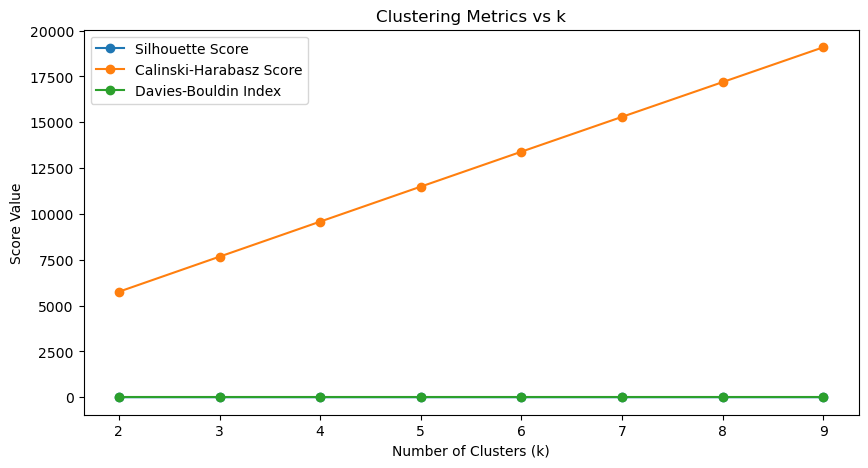

In [8]:
# A6 - Try multiple k values and compare clustering scores
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import matplotlib.pyplot as plt

def compare_k_values(data, k_range, seed=42):
    results = []
    for k in k_range:
        kmeans_model = KMeans(n_clusters=k, random_state=seed, n_init="auto").fit(data)
        sil = silhouette_score(data, kmeans_model.labels_)
        ch = calinski_harabasz_score(data, kmeans_model.labels_)
        db = davies_bouldin_score(data, kmeans_model.labels_)
        results.append((k, sil, ch, db))
    return results

if __name__ == "__main__":
    df = pd.read_csv("RFMiD_Training_Labels.csv")
    features_only = df.drop(columns=df.columns[-1])
    
    k_range = range(2, 10)  # Trying k from 2 to 9
    scores = compare_k_values(features_only, k_range)
    
    # Plot metrics against k
    ks, sils, chs, dbs = zip(*scores)
    plt.figure(figsize=(10, 5))
    plt.plot(ks, sils, marker='o', label='Silhouette Score')
    plt.plot(ks, chs, marker='o', label='Calinski-Harabasz Score')
    plt.plot(ks, dbs, marker='o', label='Davies-Bouldin Index')
    plt.xlabel("Number of Clusters (k)")
    plt.ylabel("Score Value")
    plt.title("Clustering Metrics vs k")
    plt.legend()
    plt.show()


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

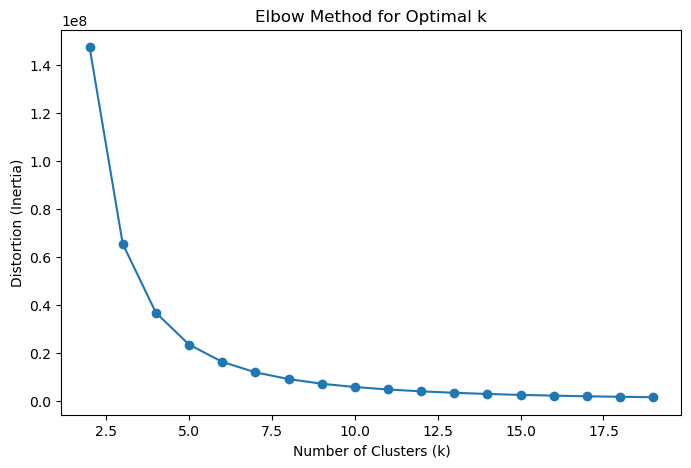

In [10]:
# A7 - Find optimal k using Elbow Method
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

def elbow_method_plot(data, k_min=2, k_max=20, seed=42):
    distortions = []
    for k in range(k_min, k_max):
        kmeans = KMeans(n_clusters=k, random_state=seed, n_init="auto").fit(data)
        distortions.append(kmeans.inertia_)
    
    plt.figure(figsize=(8, 5))
    plt.plot(range(k_min, k_max), distortions, marker='o')
    plt.xlabel("Number of Clusters (k)")
    plt.ylabel("Distortion (Inertia)")
    plt.title("Elbow Method for Optimal k")
    plt.show()

if __name__ == "__main__":
    df = pd.read_csv("RFMiD_Training_Labels.csv")
    features_only = df.drop(columns=df.columns[-1])
    
    elbow_method_plot(features_only)
